# Week 2 - Assignment

#### Roshana Mojtaba - 2050955
#### Attar Aidin - 2048654
#### Amjadi Bahador - 2040470
#### Joulaei Vijouyeh Roya - 2050954

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras,sklearn
import tensorflow as tf
import pandas as pd

from keras.models import Sequential
from keras.layers import Dropout, Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

plt.rcParams['font.size'] = 14



%run nonlinear_function.py

## Exercise 1

In [ ]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 1
x = np.loadtxt(filename('data', TYPE), delimiter=' ')
y = np.loadtxt(filename('labels', TYPE), delimiter=' ')
N = len(x)

x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
N_red = len(x_red)

x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
N_inc = len(x_inc)


#dim of a sample
L = len(x[0])
print('Regular set:', L)

L_red = len(x_red[0])
print('Reduced set:', L_red)

L_inc = len(x_inc[0])
print('Increased set:', L_inc)


N_train_red = int( perc_train * N_red )
N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')

Regular set: 2
Reduced set: 2
Increased set: 2
Regular data		: 4000			train		: 3200
Reduced data		: 2000			train		: 1600
Increased data		: 8000			train		: 6400


### Split training and test data

In [ ]:
(x_train, y_train) = (x[:N_train],y[:N_train])
(x_valid, y_valid) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
(x_train_red, y_train_red) = (x_red[:N_train_red],y_red[:N_train_red])
(x_valid_red, y_valid_red) = (x_red[N_train_red:],y_red[N_train_red:])
print("Train:",len(x_train_red),"\t Validation:",len(x_valid_red))

Train: 1600 	 Validation: 400


In [ ]:
(x_train_inc, y_train_inc) = (x_inc[:N_train_inc],y_inc[:N_train_inc])
(x_valid_inc, y_valid_inc) = (x_inc[N_train_inc:],y_inc[N_train_inc:])
print("Train:",len(x_train_inc),"\t Validation:",len(x_valid_inc))

Train: 6400 	 Validation: 1600


In [ ]:
# Wrong! First divide and then augment
x_train_aug = np.zeros( shape = (x_train.shape[0] * 10, x_train.shape[1]) )
y_train_aug = np.zeros( shape =  y_train.shape[0] * 10 )
for i in range( x_train.shape[0] ):
    S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
    x_train_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
    y_train_aug[i*10:i*10+10] = y[i]
x_valid_aug, y_valid_aug = x_valid, y_valid

x_aug = np.concatenate( [x_train_aug, x_valid_aug] )
y_aug = np.concatenate( [y_train_aug, y_valid_aug] )

N_aug = len(x_aug)

N_train_aug = len(x_train_aug)
print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

L_aug = len(x_aug[0])
print('Augmented set:', L_inc)

print("Train:",len(x_train_aug),"\t Validation:",len(x_valid_aug))


Augmented data		: 32800			train		: 32000
Augmented set: 2
Train: 32000 	 Validation: 800


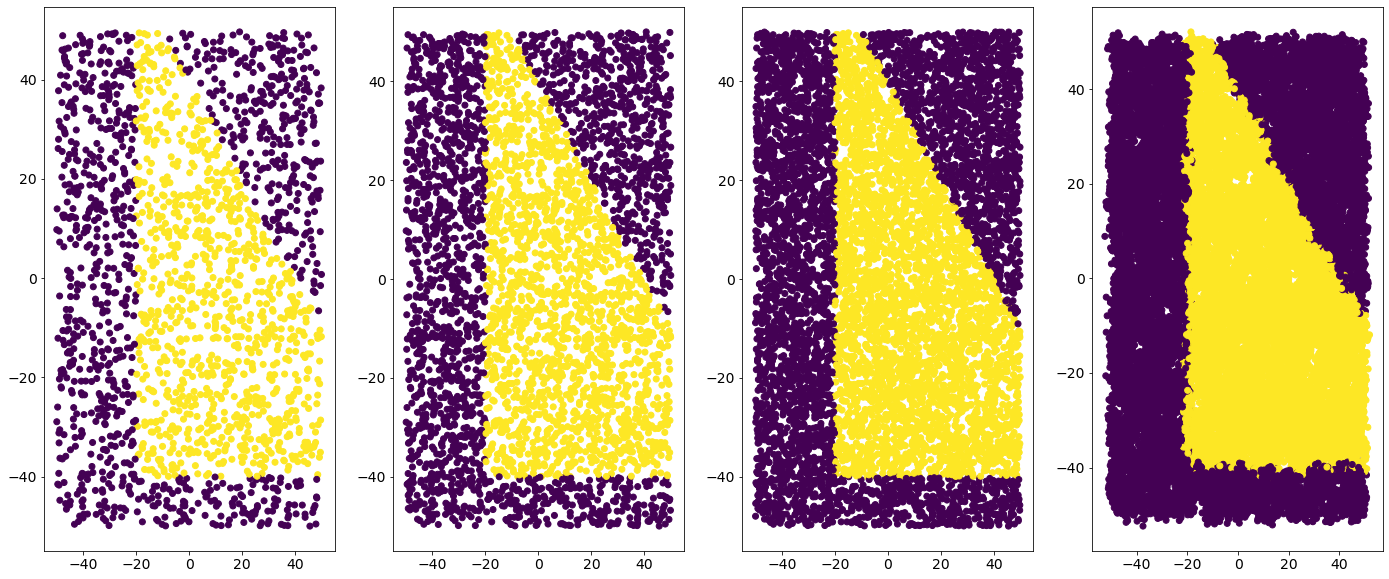

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize = (24,10))
ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax[1].scatter(x    [:,0],x    [:,1],c=y    )
ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

### Rescale input data

In [ ]:
def Rescale(x):
    #return (x-x.mean())/np.sqrt(x.var())
    return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

In [ ]:
# reproducibility
np.random.seed(12345)

CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_red.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 20)                60        
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 20)                60        
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_inc.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 2)                 6         
                                                                 
 dense_9 (Dense)             (None, 20)                60        
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dropout_2 (Dropout)         (None, 20)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
CASE = 1

if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model_aug.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 2)                 6         
                                                                 
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 20)                420       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


### Optimization method and cost function

In [ ]:
model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

In [ ]:
model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

### Training

In [ ]:
fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=2)

Epoch 1/400
32/32 - 1s - loss: 0.6973 - accuracy: 0.5869 - val_loss: 0.6935 - val_accuracy: 0.6575 - 768ms/epoch - 24ms/step
Epoch 2/400
32/32 - 0s - loss: 0.6920 - accuracy: 0.6131 - val_loss: 0.6896 - val_accuracy: 0.6225 - 66ms/epoch - 2ms/step
Epoch 3/400
32/32 - 0s - loss: 0.6877 - accuracy: 0.6187 - val_loss: 0.6842 - val_accuracy: 0.6025 - 70ms/epoch - 2ms/step
Epoch 4/400
32/32 - 0s - loss: 0.6802 - accuracy: 0.6319 - val_loss: 0.6751 - val_accuracy: 0.6450 - 70ms/epoch - 2ms/step
Epoch 5/400
32/32 - 0s - loss: 0.6651 - accuracy: 0.7188 - val_loss: 0.6521 - val_accuracy: 0.7725 - 61ms/epoch - 2ms/step
Epoch 6/400
32/32 - 0s - loss: 0.6351 - accuracy: 0.7894 - val_loss: 0.6175 - val_accuracy: 0.7950 - 62ms/epoch - 2ms/step
Epoch 7/400
32/32 - 0s - loss: 0.5924 - accuracy: 0.8250 - val_loss: 0.5720 - val_accuracy: 0.8400 - 64ms/epoch - 2ms/step
Epoch 8/400
32/32 - 0s - loss: 0.5444 - accuracy: 0.8356 - val_loss: 0.5260 - val_accuracy: 0.8500 - 67ms/epoch - 2ms/step
Epoch 9/400
32

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6917 - accuracy: 0.5172 - val_loss: 0.6578 - val_accuracy: 0.5750 - 601ms/epoch - 9ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6388 - accuracy: 0.6284 - val_loss: 0.6101 - val_accuracy: 0.6963 - 117ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5923 - accuracy: 0.7138 - val_loss: 0.5693 - val_accuracy: 0.7100 - 119ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.5519 - accuracy: 0.7256 - val_loss: 0.5266 - val_accuracy: 0.7375 - 114ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.5048 - accuracy: 0.7356 - val_loss: 0.4745 - val_accuracy: 0.7638 - 128ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.4537 - accuracy: 0.7784 - val_loss: 0.4355 - val_accuracy: 0.8525 - 136ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.4229 - accuracy: 0.8044 - val_loss: 0.4030 - val_accuracy: 0.8625 - 122ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3999 - accuracy: 0.8178 - val_loss: 0.3786 - val_accuracy: 0.8900 - 102ms/epoch - 2ms/step
Epoch 9/

In [ ]:
fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=2)

Epoch 1/400
128/128 - 1s - loss: 0.6640 - accuracy: 0.6202 - val_loss: 0.6226 - val_accuracy: 0.6900 - 738ms/epoch - 6ms/step
Epoch 2/400
128/128 - 0s - loss: 0.6178 - accuracy: 0.6973 - val_loss: 0.5808 - val_accuracy: 0.7387 - 218ms/epoch - 2ms/step
Epoch 3/400
128/128 - 0s - loss: 0.5897 - accuracy: 0.7336 - val_loss: 0.5393 - val_accuracy: 0.7819 - 235ms/epoch - 2ms/step
Epoch 4/400
128/128 - 0s - loss: 0.5399 - accuracy: 0.7767 - val_loss: 0.4782 - val_accuracy: 0.8294 - 232ms/epoch - 2ms/step
Epoch 5/400
128/128 - 0s - loss: 0.4702 - accuracy: 0.8206 - val_loss: 0.3843 - val_accuracy: 0.8706 - 227ms/epoch - 2ms/step
Epoch 6/400
128/128 - 0s - loss: 0.3855 - accuracy: 0.8567 - val_loss: 0.2965 - val_accuracy: 0.8994 - 204ms/epoch - 2ms/step
Epoch 7/400
128/128 - 0s - loss: 0.3251 - accuracy: 0.8908 - val_loss: 0.2543 - val_accuracy: 0.9281 - 211ms/epoch - 2ms/step
Epoch 8/400
128/128 - 0s - loss: 0.3017 - accuracy: 0.9052 - val_loss: 0.2374 - val_accuracy: 0.9294 - 200ms/epoch - 2

In [ ]:
fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=2)

Epoch 1/400
640/640 - 1s - loss: 0.5369 - accuracy: 0.7300 - val_loss: 0.3678 - val_accuracy: 0.8325 - 1s/epoch - 2ms/step
Epoch 2/400
640/640 - 1s - loss: 0.3219 - accuracy: 0.8672 - val_loss: 0.2676 - val_accuracy: 0.8825 - 816ms/epoch - 1ms/step
Epoch 3/400
640/640 - 1s - loss: 0.2471 - accuracy: 0.8976 - val_loss: 0.1969 - val_accuracy: 0.9100 - 829ms/epoch - 1ms/step
Epoch 4/400
640/640 - 1s - loss: 0.2065 - accuracy: 0.9076 - val_loss: 0.1728 - val_accuracy: 0.9162 - 841ms/epoch - 1ms/step
Epoch 5/400
640/640 - 1s - loss: 0.1949 - accuracy: 0.9116 - val_loss: 0.1680 - val_accuracy: 0.9212 - 840ms/epoch - 1ms/step
Epoch 6/400
640/640 - 1s - loss: 0.1893 - accuracy: 0.9141 - val_loss: 0.1595 - val_accuracy: 0.9312 - 823ms/epoch - 1ms/step
Epoch 7/400
640/640 - 1s - loss: 0.1816 - accuracy: 0.9174 - val_loss: 0.1538 - val_accuracy: 0.9312 - 833ms/epoch - 1ms/step
Epoch 8/400
640/640 - 1s - loss: 0.1763 - accuracy: 0.9189 - val_loss: 0.1547 - val_accuracy: 0.9275 - 834ms/epoch - 1ms/

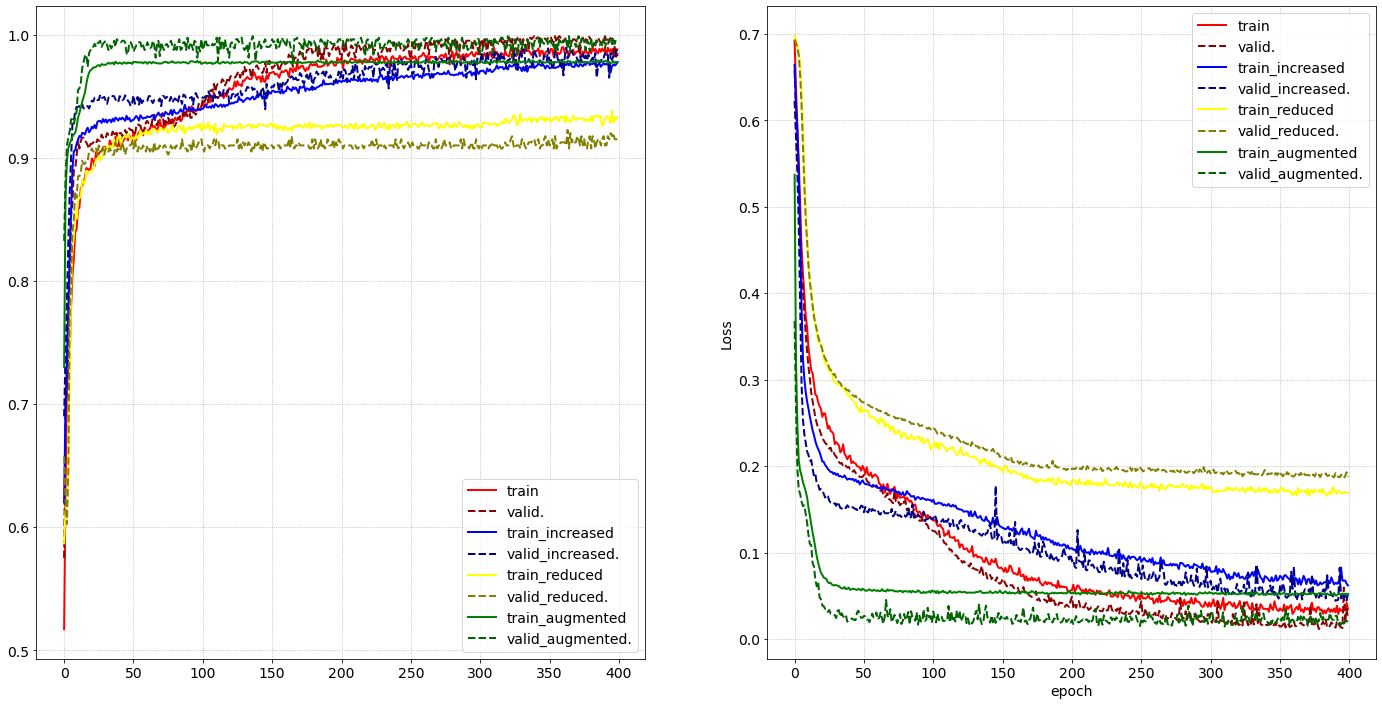

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


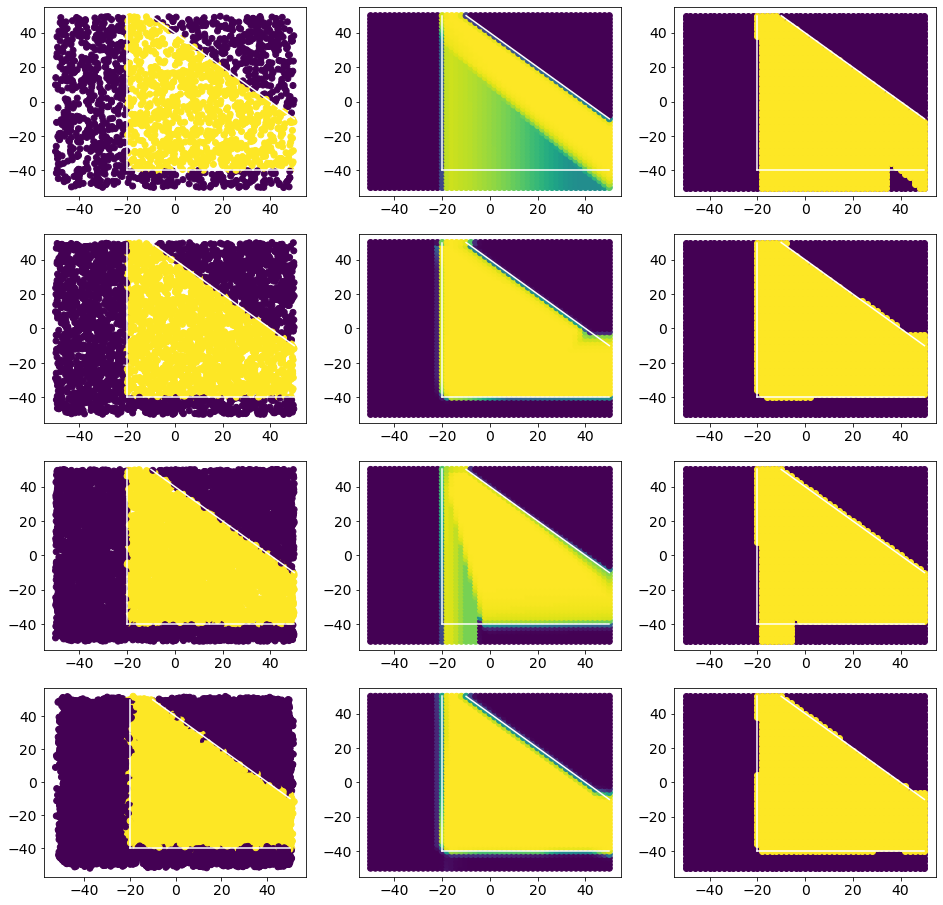

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 2

### Model definition

In [ ]:
def create_DNN(activation, dropout_rate, layers):
    model = Sequential()

    model.add(Dense(L,input_shape=(L,),activation = activation))
    for i in range(len(layers)):
        model.add(Dense(layers[i],activation = activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation="sigmoid"))
    return model

### Compilation of the model

In [ ]:
def compile_model(optimizer=tf.keras.optimizers.Adam(), activation = "relu", dropout_rate = 0.2, layers = (20, 20)):
    # create the mode
    model=create_DNN(activation, dropout_rate, layers)
    # compile the model
    model.compile(loss=keras.losses.binary_crossentropy,
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

### Grid search

Huge computation in next cell $\sim$3h

In [ ]:
'''# call Keras scikit wrapper
model_gridsearch = KerasClassifier(build_fn = compile_model)

# list of allowed optional arguments for the optimizer, see `compile_model()`
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#optimizer = ['SGD', 'Nadam']
# list of activation functions
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
# list of dropout rates
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
# define parameter dictionary
param_grid = dict(optimizer=optimizer, activation = activation, dropout_rate=dropout_rate)
#param_grid = dict(optimizer=optimizer)
# call scikit grid search module
grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
grid_result = grid.fit(x_train,y_train, epochs=50, batch_size = 50, shuffle = True, verbose = 0)

results = pd.DataFrame.from_dict(grid_result.cv_results_)
results.to_csv('GridSearchResults.csv')

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))'''

25/25 [==============================] - 0s 1ms/step - loss: 0.6300 - accuracy: 0.6300
Best: 0.938125 using {'activation': 'relu', 'dropout_rate': 0.5, 'optimizer': 'Adam'}
0.537500 (0.027937) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'SGD'}
0.706875 (0.040740) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'RMSprop'}
0.512500 (0.045061) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'Adagrad'}
0.460625 (0.025226) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'Adadelta'}
0.729687 (0.041790) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'Adam'}
0.554062 (0.044916) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'Adamax'}
0.670000 (0.031783) with: {'activation': 'softmax', 'dropout_rate': 0.0, 'optimizer': 'Nadam'}
0.537500 (0.027937) with: {'activation': 'softmax', 'dropout_rate': 0.1, 'optimizer': 'SGD'}
0.687500 (0.050598) with: {'activation': 'softmax', 'dropout_rat

In [ ]:
results = pd.read_csv('GridSearchResults.csv')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,3.538826,0.040204,0.183566,0.017102,softmax,0.0,SGD,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55000,0.49625,0.53125,0.57250,0.537500,0.027937,404
1,4.382128,0.739145,0.257232,0.139030,softmax,0.0,RMSprop,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.72875,0.74500,0.63875,0.71500,0.706875,0.040740,168
2,3.599413,0.015660,0.175823,0.014139,softmax,0.0,Adagrad,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.45000,0.49625,0.53125,0.57250,0.512500,0.045061,502
3,3.672416,0.055701,0.185866,0.005563,softmax,0.0,Adadelta,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.45000,0.49625,0.46875,0.42750,0.460625,0.025226,550
4,4.254520,0.769273,0.166217,0.005948,softmax,0.0,Adam,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.66375,0.76250,0.76875,0.72375,0.729687,0.041790,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555,3.446268,0.040653,0.196041,0.016147,linear,0.9,Adagrad,"{'activation': 'linear', 'dropout_rate': 0.9, ...",0.57875,0.49625,0.57375,0.56250,0.552813,0.033182,379
556,3.767202,0.407876,0.195162,0.014291,linear,0.9,Adadelta,"{'activation': 'linear', 'dropout_rate': 0.9, ...",0.45500,0.37375,0.36875,0.64625,0.460938,0.112335,549
557,4.120475,0.864237,0.208528,0.016013,linear,0.9,Adam,"{'activation': 'linear', 'dropout_rate': 0.9, ...",0.60750,0.58000,0.61750,0.62125,0.606562,0.016138,335
558,4.163983,0.859622,0.192847,0.009626,linear,0.9,Adamax,"{'activation': 'linear', 'dropout_rate': 0.9, ...",0.59750,0.59750,0.62250,0.62500,0.610625,0.013155,330


## Exercise 3

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 2)                 6         
                                                                 
 dense_49 (Dense)            (None, 20)                60        
                                                                 
 dense_50 (Dense)            (None, 20)                420       
                                                                 
 dropout_12 (Dropout)        (None, 20)                0         
                                                                 
 dense_51 (Dense)            (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_13"
___________________________

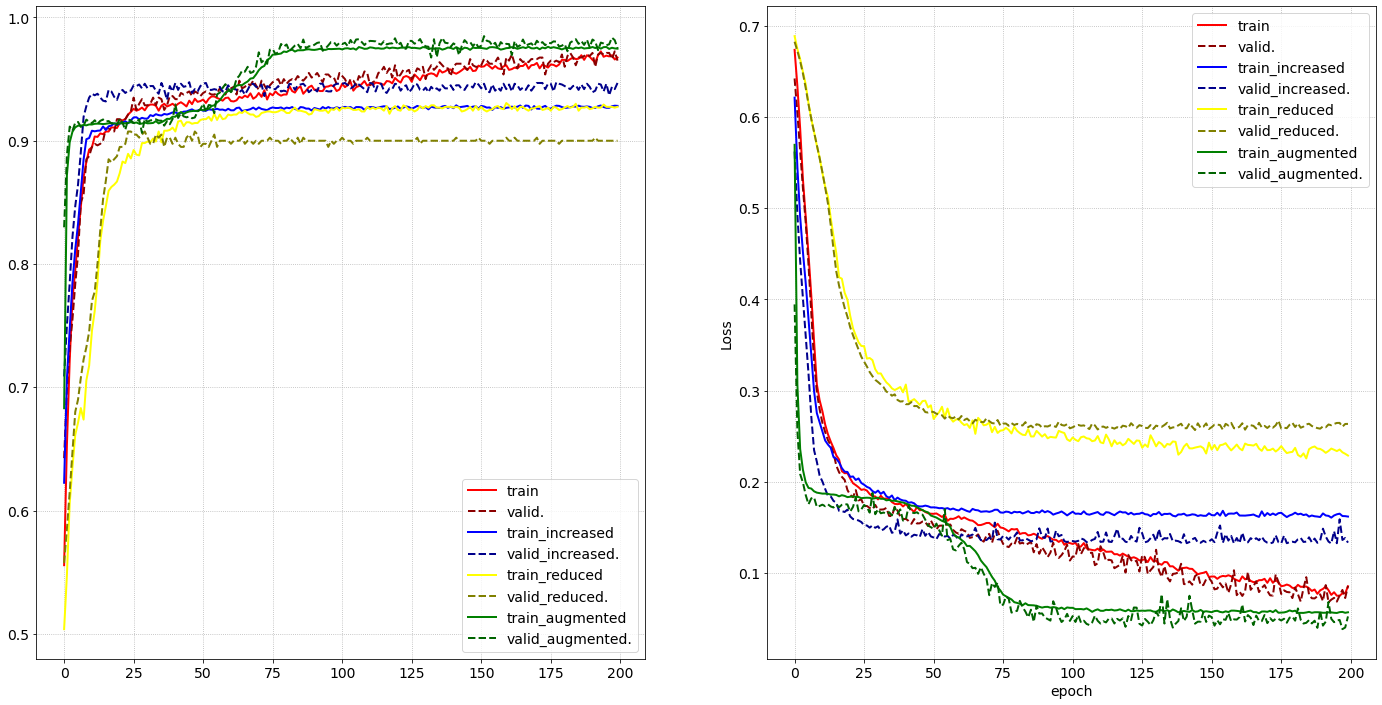

In [ ]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

x_train_red = Rescale(x_train_red)
x_valid_red = Rescale(x_valid_red)

x_train_inc = Rescale(x_train_inc)
x_valid_inc = Rescale(x_valid_inc)

x_train_aug = Rescale(x_train_aug)
x_valid_aug = Rescale(x_valid_aug)

# reproducibility
np.random.seed(12345)


# Reduced set
CASE = 1

if CASE==1:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dense(20, activation='relu'))
    model_red.add(Dropout(0.2)) #more stochastic
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_red = Sequential()
    model_red.add(Dense(L_red,input_shape=(L_red,), activation='sigmoid'))
    model_red.add(Dense(3, activation='sigmoid'))
    model_red.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_red.summary())

model_red.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_red = model_red.fit(x_train_red, y_train_red,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_red,y_valid_red),
                        verbose=0)


# regular set
if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model.summary())

model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=0)

              

# increased set
if CASE==1:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dense(20, activation='relu'))
    model_inc.add(Dropout(0.2)) #more stochastic
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_inc = Sequential()
    model_inc.add(Dense(L_inc,input_shape=(L_inc,), activation='sigmoid'))
    model_inc.add(Dense(3, activation='sigmoid'))
    model_inc.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_inc.summary())

model_inc.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_inc = model_inc.fit(x_train_inc, y_train_inc,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_inc,y_valid_inc),
                        verbose=0)



# augmented set
if CASE==1:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dense(20, activation='relu'))
    model_aug.add(Dropout(0.2)) #more stochastic
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=200
if CASE==2:
    model_aug = Sequential()
    model_aug.add(Dense(L_aug,input_shape=(L_aug,), activation='sigmoid'))
    model_aug.add(Dense(3, activation='sigmoid'))
    model_aug.add(Dense(1, activation='sigmoid'))
    nepoch=200
print(model_aug.summary())

model_aug.compile(loss='binary_crossentropy',
                  #optimizer='RNSprop',
                  optimizer='adam',
                  metrics=['accuracy'])

fit_aug = model_aug.fit(x_train_aug, y_train_aug,
                        epochs=nepoch, batch_size=50,
                        validation_data=(x_valid_aug,y_valid_aug),
                        verbose=0)


fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history['accuracy'    ],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_accuracy'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history['accuracy'    ],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_accuracy'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history['accuracy'    ],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_accuracy'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.plot(fit_inc.history[    'loss'],label="train_increased",  lw = 2, ls = 'solid' , c = 'blue')
ax.plot(fit_inc.history['val_loss'],label="valid_increased.", lw = 2, ls = 'dashed', c = 'darkblue')
ax.plot(fit_red.history[    'loss'],label="train_reduced",    lw = 2, ls = 'solid' , c = 'yellow')
ax.plot(fit_red.history['val_loss'],label="valid_reduced.",   lw = 2, ls = 'dashed', c = 'olive')
ax.plot(fit_aug.history[    'loss'],label="train_augmented",  lw = 2, ls = 'solid' , c = 'green')
ax.plot(fit_aug.history['val_loss'],label="valid_augmented.", lw = 2, ls = 'dashed', c = 'darkgreen')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()



In [ ]:
# NOT FINISHED

dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])
print(grid[:,0])
# RESCALE
#grid_r = grid/50
grid_r = grid
print(grid[:,1])
for i in range( grid.shape[0] ):
    grid_r[i,:] = (grid[i,0]/np.sqrt(grid[:,0].var()), grid[i,1]/np.sqrt(grid[:,1].var()))
print(grid_r)
pred_red = model_red.predict(grid_r)
pred     = model.predict    (grid_r)
pred_inc = model_inc.predict(grid_r)
pred_aug = model_aug.predict(grid_r)

51 2601
[50. 50.]
[-50. -48. -46. ...  46.  48.  50.]
[-50. -50. -50. ...  50.  50.  50.]
[[-1.69841555 -1.69841555]
 [-1.6313831  -1.69935739]
 [-1.56420924 -1.70030148]
 ...
 [16.78740668 17.98594863]
 [18.40081336 19.02928988]
 [20.32743001 20.25462083]]


(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)
(2601, 2) (2601, 1)


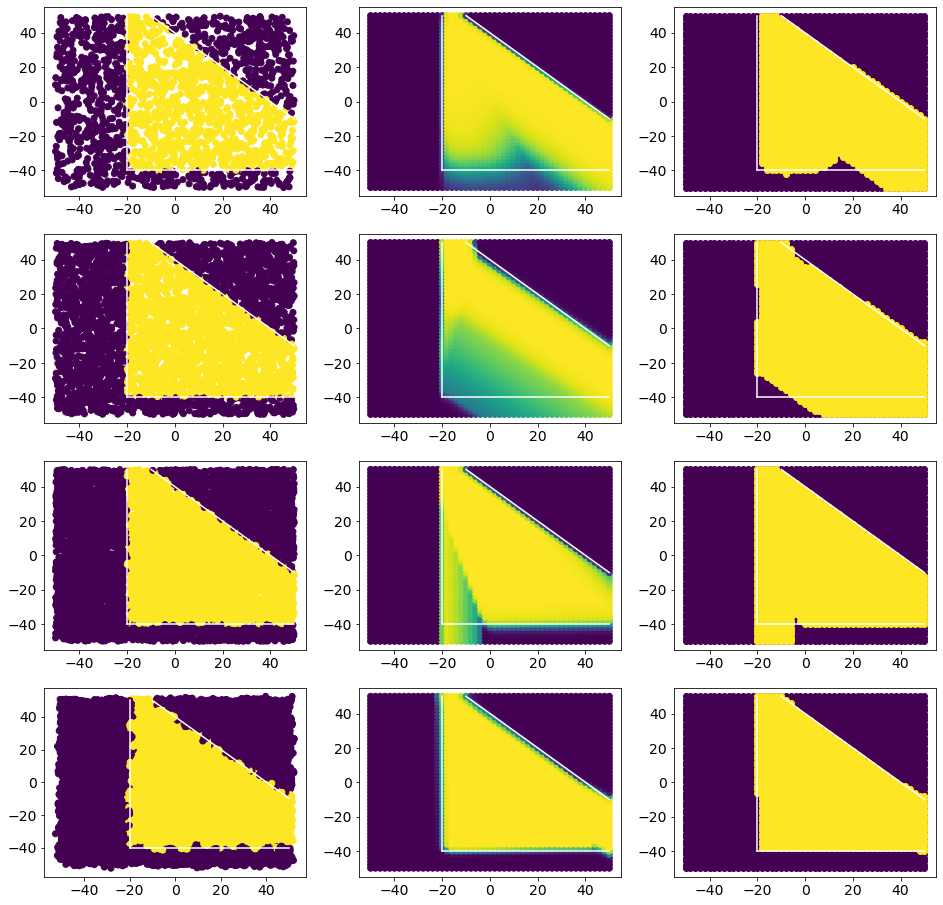

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
    #ax.plot((-20,-20),(-40,50),c="w")
    #ax.plot((-20,50),(-40,-40),c="w")
    #ax.plot((-10,50),(50,-10),c="w")

fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_red[:,0],x_red[:,1],c=y_red)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_red.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_red[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_red>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[1,0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1,1]
print(grid.shape, pred.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
boundaries()
ax=AX[1,2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[2,0]
ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
boundaries()
ax=AX[2,1]
print(grid.shape, pred_inc.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
boundaries()
ax=AX[2,2]
W1=np.where(pred_inc>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

ax=AX[3,0]
ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
boundaries()
ax=AX[3,1]
print(grid.shape, pred_aug.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
boundaries()
ax=AX[3,2]
W1=np.where(pred_aug>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

plt.show()

## Exercise 4

In [ ]:
%run optional_function.py

Regular set: 2


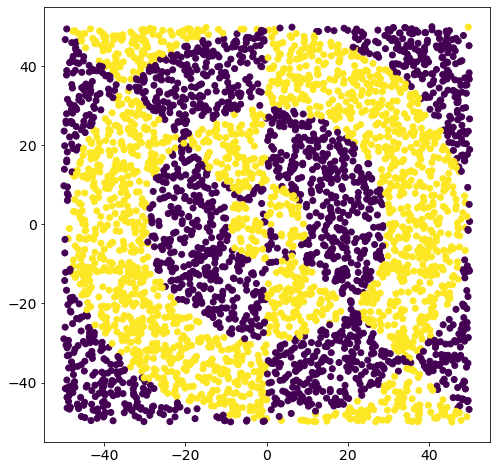

In [ ]:
#training data
perc_train = 0.8

#keras works with numpy arrays: just use them from the start
TYPE = 2
x_diff = np.loadtxt(filename('diff_data', TYPE), delimiter=' ')
y_diff = np.loadtxt(filename('labels_diff_data', TYPE), delimiter=' ')
N = len(x_diff)

# x_red = np.loadtxt(filename('data_red', TYPE), delimiter=' ')
# y_red = np.loadtxt(filename('labels_red', TYPE), delimiter=' ')
# N_red = len(x_red)

# x_inc = np.loadtxt(filename('data_inc', TYPE), delimiter=' ')
# y_inc = np.loadtxt(filename('labels_inc', TYPE), delimiter=' ')
# N_inc = len(x_inc)

# x_aug = np.zeros( shape = (x.shape[0] * 10, x.shape[1]) )
# y_aug = np.zeros( shape = y.shape[0] * 10 )
# for i in range( x.shape[0] ):
#     S    = np.random.normal( 0, 1 , size = ( 10, 2 ) )
#     x_aug[i*10:i*10+10] = np.array( [x[i, 0] + S[:, 0], x[i, 1] + S[:, 1]] ).T
#     y_aug[i*10:i*10+10] = y[i]
# N_aug = len(x_aug)

#dim of a sample
L = len(x_diff[0])
print('Regular set:', L)

# L_red = len(x_red[0])
# print('Reduced set:', L_red)

# L_inc = len(x_inc[0])
# print('Increased set:', L_inc)

# L_aug = len(x_aug[0])
# print('Augmented set:', L_inc)


# N_train_red = int( perc_train * N_red )
# N_train_inc = int( perc_train * N_inc )
N_train     = int( perc_train * N     )
# N_train_aug = int( perc_train * N_aug )
# print(f'Regular data\t\t: {N}\t\t\ttrain\t\t: {N_train}')
# print(f'Reduced data\t\t: {N_red}\t\t\ttrain\t\t: {N_train_red}')
# print(f'Increased data\t\t: {N_inc}\t\t\ttrain\t\t: {N_train_inc}')
# print(f'Augmented data\t\t: {N_aug}\t\t\ttrain\t\t: {N_train_aug}')

fig, ax = plt.subplots(figsize = (8,8))
# ax[0].scatter(x_red[:,0],x_red[:,1],c=y_red)
ax.scatter(x_diff    [:,0],x_diff    [:,1],c=y_diff    )
# ax[2].scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# ax[3].scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
plt.show()

In [ ]:
(x_train, y_train) = (x_diff[:N_train],y_diff[:N_train])
(x_valid, y_valid) = (x_diff[N_train:],y_diff[N_train:])
print("Train:",len(x_train),"\t Validation:",len(x_valid))

Train: 3200 	 Validation: 800


In [ ]:
def Rescale(x):
    return (x-x.mean())/np.sqrt(x.var())
    # return x/50

x_train     = Rescale(x_train)
x_valid     = Rescale(x_valid)

In [ ]:
CASE = 1

if CASE==1:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dropout(0.2)) #more stochastic
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
if CASE==2:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,), activation='sigmoid'))
    model.add(Dense(3, activation='sigmoid'))
    model.add(Dense(1, activation='sigmoid'))
    nepoch=400
print(model.summary())

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_236 (Dense)           (None, 2)                 6         
                                                                 
 dense_237 (Dense)           (None, 20)                60        
                                                                 
 dense_238 (Dense)           (None, 20)                420       
                                                                 
 dropout_59 (Dropout)        (None, 20)                0         
                                                                 
 dense_239 (Dense)           (None, 1)                 21        
                                                                 
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(loss='binary_crossentropy',
              #optimizer='RNSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
fit = model.fit(x_train, y_train,
                epochs=nepoch, batch_size=50,
                validation_data=(x_valid,y_valid),
                verbose=2)

Epoch 1/400
64/64 - 1s - loss: 0.6941 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5188 - 809ms/epoch - 13ms/step
Epoch 2/400
64/64 - 0s - loss: 0.6926 - accuracy: 0.5038 - val_loss: 0.6933 - val_accuracy: 0.5238 - 150ms/epoch - 2ms/step
Epoch 3/400
64/64 - 0s - loss: 0.6919 - accuracy: 0.5041 - val_loss: 0.6932 - val_accuracy: 0.5213 - 150ms/epoch - 2ms/step
Epoch 4/400
64/64 - 0s - loss: 0.6917 - accuracy: 0.5178 - val_loss: 0.6935 - val_accuracy: 0.5213 - 147ms/epoch - 2ms/step
Epoch 5/400
64/64 - 0s - loss: 0.6908 - accuracy: 0.5238 - val_loss: 0.6940 - val_accuracy: 0.5038 - 141ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.6910 - accuracy: 0.5228 - val_loss: 0.6942 - val_accuracy: 0.5375 - 134ms/epoch - 2ms/step
Epoch 7/400
64/64 - 0s - loss: 0.6902 - accuracy: 0.5375 - val_loss: 0.6944 - val_accuracy: 0.4787 - 142ms/epoch - 2ms/step
Epoch 8/400
64/64 - 0s - loss: 0.6896 - accuracy: 0.5297 - val_loss: 0.6951 - val_accuracy: 0.4712 - 159ms/epoch - 2ms/step
Epoch 9

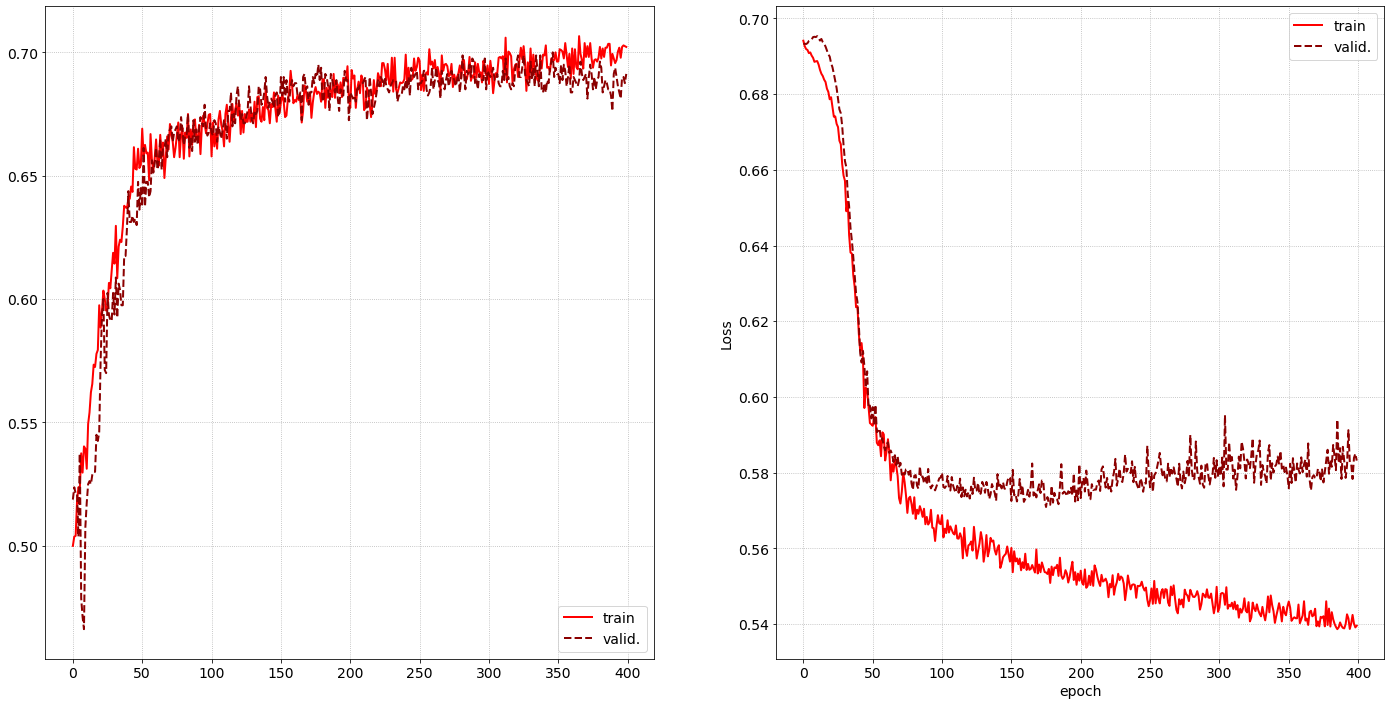

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(24,12))
ax=AX[0]
ax.plot(fit.history[    'accuracy'    ],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_accuracy'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.legend(loc='lower right')
ax.grid(ls='dotted')

ax=AX[1]
ax.plot(fit.history[        'loss'],label="train",            lw = 2, ls = 'solid' , c = 'red')
ax.plot(fit.history[    'val_loss'],label="valid.",           lw = 2, ls = 'dashed', c = 'darkred')
ax.set_xlabel('epoch')
ax.set_ylabel("Loss")
ax.legend()
ax.grid(ls='dotted')

plt.show()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE
grid_r = grid/50
pred_diff     = model.predict    (grid_r)

51 2601
[50. 50.]


(2601, 2) (2601, 1)


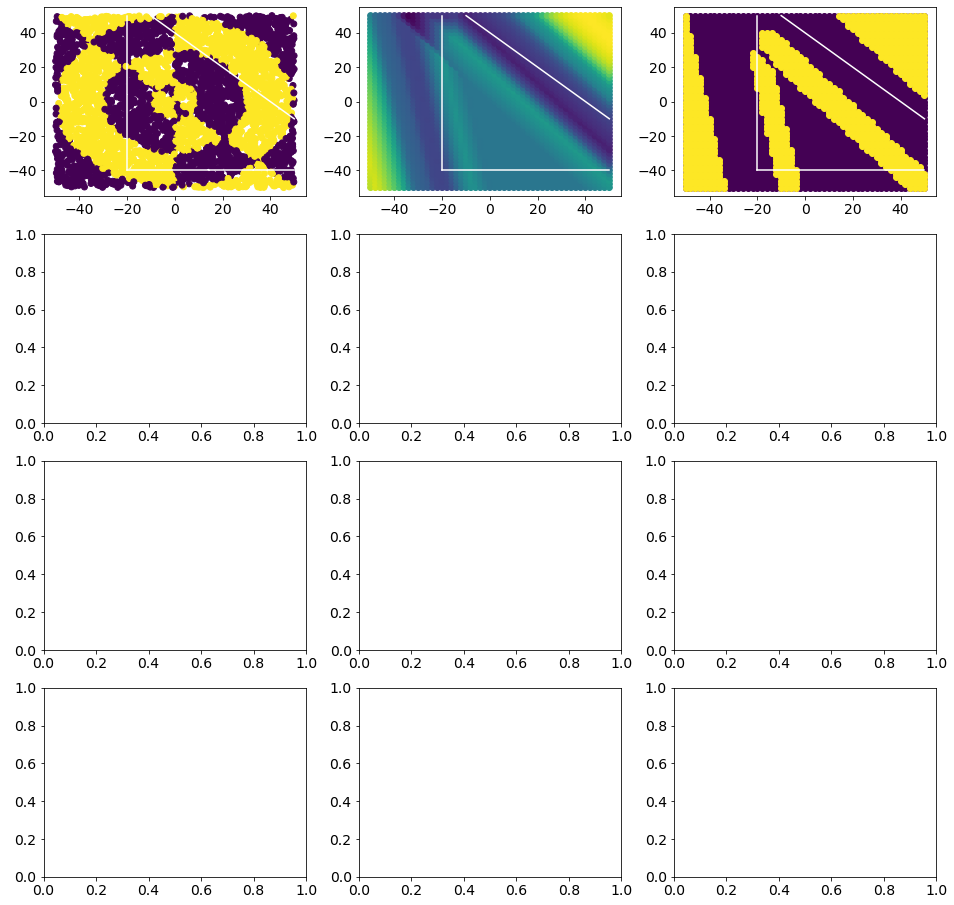

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(4,3,figsize=(16,16))
ax=AX[0,0]
ax.scatter(x_diff[:,0],x_diff[:,1],c=y_diff)
boundaries()
ax=AX[0,1]
print(grid.shape, pred_diff.shape)
ax.scatter(grid[:,0],grid[:,1],c=pred_diff[:,0])
boundaries()
ax=AX[0,2]
W1=np.where(pred_diff>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()

# ax=AX[1,0]
# ax.scatter(x[:,0],x[:,1],c=y)
# boundaries()
# ax=AX[1,1]
# print(grid.shape, pred.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred[:,0])
# boundaries()
# ax=AX[1,2]
# W1=np.where(pred>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[2,0]
# ax.scatter(x_inc[:,0],x_inc[:,1],c=y_inc)
# boundaries()
# ax=AX[2,1]
# print(grid.shape, pred_inc.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_inc[:,0])
# boundaries()
# ax=AX[2,2]
# W1=np.where(pred_inc>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

# ax=AX[3,0]
# ax.scatter(x_aug[:,0],x_aug[:,1],c=y_aug)
# boundaries()
# ax=AX[3,1]
# print(grid.shape, pred_aug.shape)
# ax.scatter(grid[:,0],grid[:,1],c=pred_aug[:,0])
# boundaries()
# ax=AX[3,2]
# W1=np.where(pred_aug>0.5)[0] 
# ax.scatter(grid[:,0],grid[:,1],c="#440154")
# ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
# boundaries()

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1cb9264e-65a5-431d-a980-16667908489e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>